In [2]:
'''
Data from kaggle: https://www.kaggle.com/c/yelp-recsys-2013 it is a dataset of 10,000 yelp reviews. 
Each review is by a particular person for a particular business/restaurant
'Cool' is a review of the review itself, same as 'useful' and 'funny'
Each review starts with 0 'cool' reviews and tehre is no limit to how many can be accrued.
This NLP project will attempt to classify the text reviews into 5 star ratings
'''

import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
yelp = pd.read_csv('yelp.csv')

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [96]:
#Generating a column for number of words in a text column
yelp['text_length']=yelp['text'].str.split(' ').apply(len)

In [97]:
yelp['text_length'].iloc[2]

16

In [125]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,160
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,256
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,75
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,85


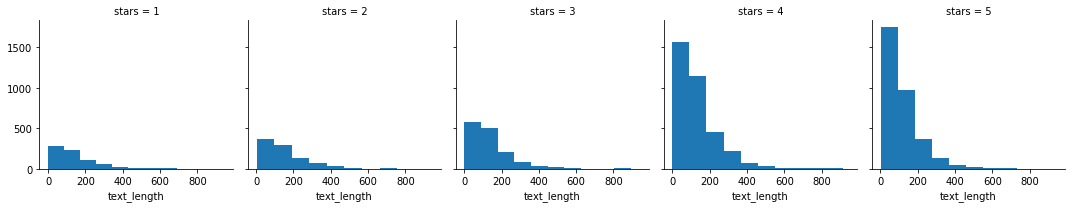

In [106]:
#Facetgrid of text length and stars given
g = sns.FacetGrid(yelp, col="stars",)
g = g.map(plt.hist, "text_length")

In [118]:
#yelp.drop('length', inplace = True, axis = 1)

In [119]:
#Longer texts seem to give higer 5 star ratings, so text length could be an indicator

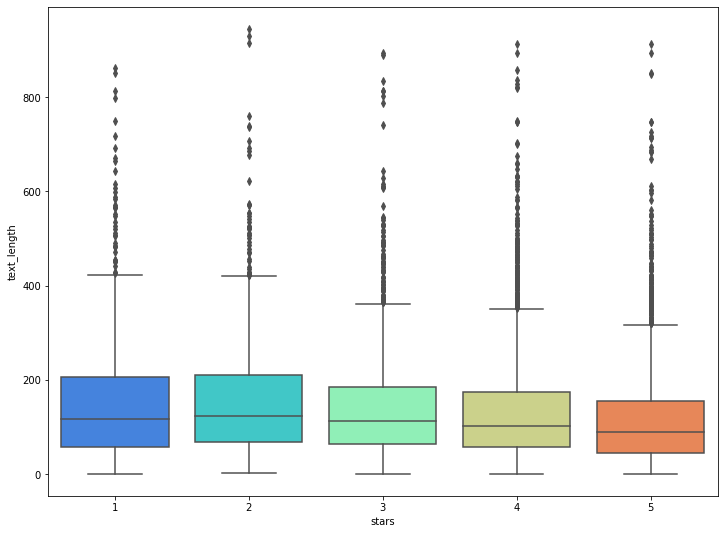

In [120]:
fig = plt.subplots(figsize=(12,9))
sns.boxplot(x="stars", y="text_length", data=yelp, palette='rainbow')

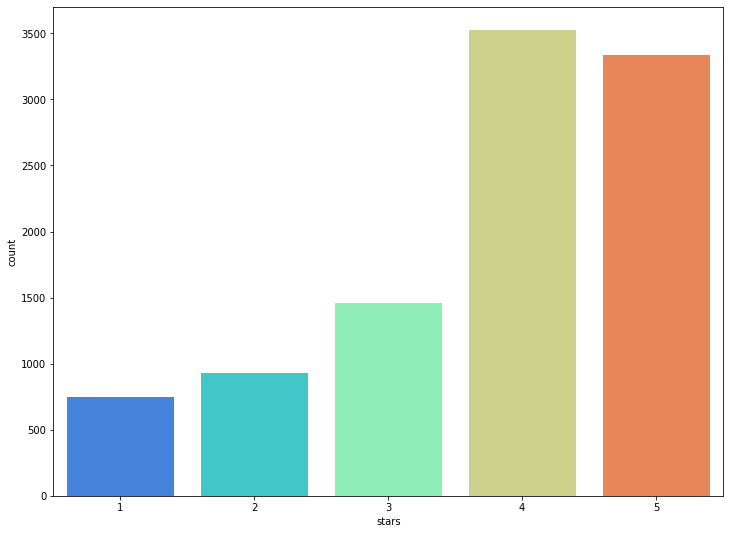

In [121]:
fig = plt.subplots(figsize=(12,9))
sns.countplot(x=yelp["stars"],palette='rainbow')

In [122]:
#Grouping by stats of each numerical columns
yelp.groupby('stars').mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,156.013351
2,0.719525,1.563107,0.875944,158.508091
3,0.788501,1.306639,0.694730,143.043806
4,0.954623,1.395916,0.670448,132.921441
5,0.944261,1.381780,0.608631,116.054840


In [123]:
#To help generate a heatmap based on correlation
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.865650
useful,-0.743329,1.000000,0.894506,0.690255
funny,-0.944939,0.894506,1.000000,0.844066
text_length,-0.865650,0.690255,0.844066,1.000000


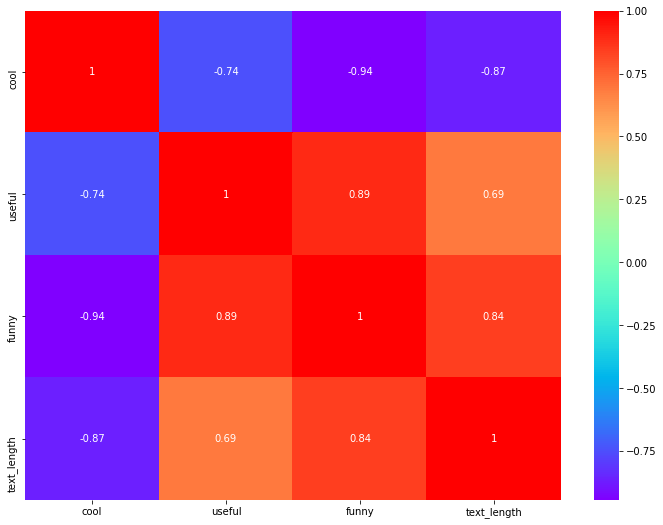

In [124]:
fig = plt.subplots(figsize=(12,9))
sns.heatmap(data=yelp.groupby('stars').mean().corr(), cmap='rainbow',annot=True)

In [136]:
#NLP classification
#To simplify, making a new DF for only 1 or 5 stars
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [141]:
yelp_class['stars'].nunique()

2

In [142]:
#Set X and y
X = yelp_class['text']
y = yelp_class['stars']

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

In [147]:
count_vect = CountVectorizer()

In [148]:
count_vect.fit_transform(X)

<4086x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 317288 stored elements in Compressed Sparse Row format>

In [150]:
X = count_vect.fit_transform(X)

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
#Model training
from sklearn.naive_bayes import MultinomialNB

In [158]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [159]:
#Predictions
predictions = nb.predict(X_test)

In [161]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [162]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[112  55]
 [ 26 625]]


              precision    recall  f1-score   support

           1       0.81      0.67      0.73       167
           5       0.92      0.96      0.94       651

    accuracy                           0.90       818
   macro avg       0.87      0.82      0.84       818
weighted avg       0.90      0.90      0.90       818



In [163]:
#Not a bad result!
#Now using text processing!

In [165]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [167]:
#Pipeline:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [169]:
#Need to redo train/test/split
#Set X and y
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
#Fit pipeline
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [172]:
#Use pipeline to predict and compare
predictions_pipe = pipeline.predict(X_test)

In [173]:
print(confusion_matrix(y_test,predictions_pipe))
print('\n')
print(classification_report(y_test,predictions_pipe))

[[  1 166]
 [  0 651]]


              precision    recall  f1-score   support

           1       1.00      0.01      0.01       167
           5       0.80      1.00      0.89       651

    accuracy                           0.80       818
   macro avg       0.90      0.50      0.45       818
weighted avg       0.84      0.80      0.71       818



In [ ]:
#TF-IDF Made things worse!